<a href="https://colab.research.google.com/github/vionalisa/TUBES-SKO/blob/main/TUBES_SKO_Panjang_Kabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama       : Vionalisa Oktavia Kusuma Ningrum
# NIM        : 1101194068
# Kelas      : TT-42-07
#Absen      : 40
# Kelas Asal : TT-43-11

Perancangan rangkaian FTTx dari sentral ke gedung lantai 40 dengan tinggi rata-rata tiap lantainya adalah 4 m

Jarak maksimum dari FTTx adalah 20 km (sentral hingga ke gedung lantai 40)

Jika tinggi rata-rata tiap tingkat gedung adalah 4 m, maka jarak dari lantai 1 ke lantai 40 adalah 160 m yaitu panjang kabel minimum.

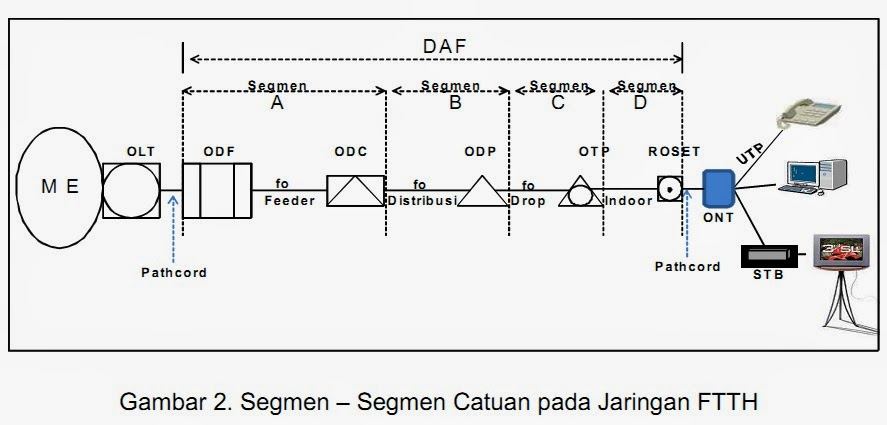

Keterangan dari gambar di atas:

OLT (Optical Line Transmission) yang terdapat pada sentral
ODF (Optical Distribution Frame) sebagai tempat peralihan antara kabel indoor dan outdoor
ODC (Optical Distribution Cabinet)
ODP (Optical Distribution Point)
OTP (Optical Termination Premises)
Roset
ONT (Optical Network Termination), dapat juga menggunakan ONU (Optical Network Unit) yang memiliki fungsi yang sama
Berdasarkan ilustrasi tersebut akan dibutuhkan 2 connector (OLT, ONT/ONU) dan 5 splices (ODF, ODC, ODP, OTP, Roset)

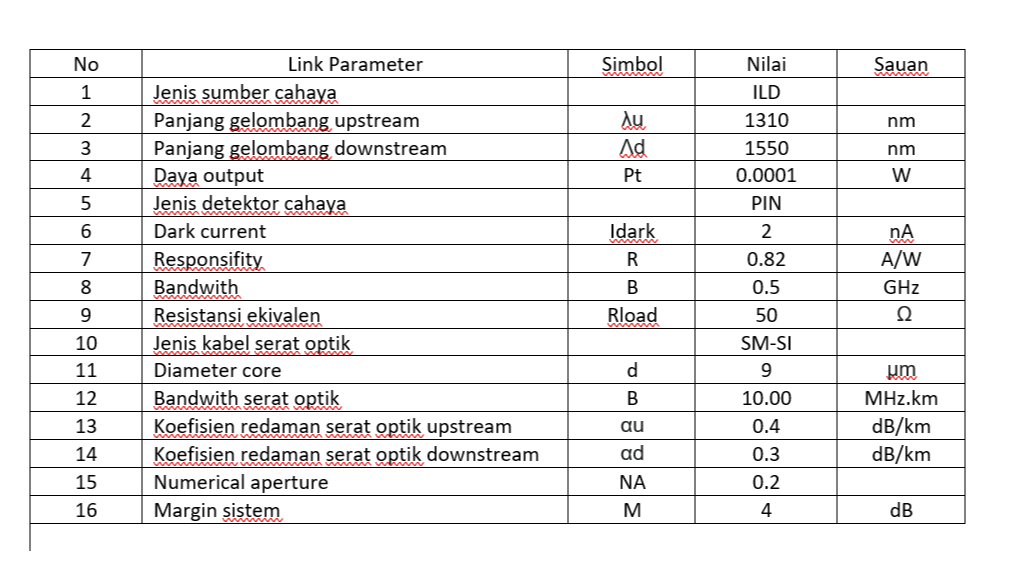

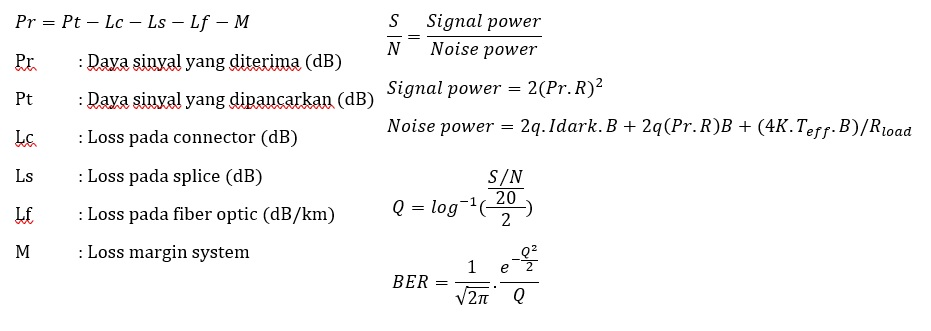

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Pt = 10*np.log(0.0001) #Daya output (dB)
p = np.arange(0.160, 20, 0.001) #Range panjang kabel optik 0.160-20 km
R = 0.82 #Responsifity
q = 1.6*(10**-19) #muatan elektron dalam Coulomb
Idark = 2*(10**-9) #Dark current
B = 0.5*(10**9) #Bandwidth
Teff = 290 #Suhu efektif dalam Kelvin
K = 1.38*(10**-23) #konstanta Stefann-Boltzmann
Rload = 50 #Resistansi ekivalen
e = 2.71828 #Bilangan euler
pi = 3.14

In [ ]:
#Daya sinyal yang diterima upstream (Pru) dalam Watt
Pru = 10**((Pt-(p*0.4)-(5*0.1)-(2*0.75)-4)/10)
print(Pru)
#Daya sinyal yang diterima downstream (Prd) dalam Watt
Prd = 10**((Pt-(p*0.3)-(5*0.1)-(2*0.75)-4)/10)
print(Prd)

[1.52496413e-10 1.52482368e-10 1.52468325e-10 ... 2.45346365e-11
 2.45323769e-11 2.45301175e-11]
[1.53059267e-10 1.53048694e-10 1.53038122e-10 ... 3.88820924e-11
 3.88794066e-11 3.88767210e-11]


In [ ]:
#Signal Power upstream (SPu) dalam A
SPu = 2*((Pru*R)**2)
print(SPu)
#Signal Power downstream (SPd) dalam A
SPd = 2*((Prd*R)**2)
print(SPd)

[3.12735337e-20 3.12677734e-20 3.12620142e-20 ... 8.09500193e-22
 8.09351091e-22 8.09202017e-22]
[3.15048167e-20 3.15004644e-20 3.14961128e-20 ... 2.03309165e-21
 2.03281079e-21 2.03252996e-21]


In [ ]:
#Total Noise Power upstream (NSu) dalam A
NSu = (2*q*Idark*B)+(2*q*(2*Pru*R)*B)+((4*K*Teff*B)/Rload)
print(NSu)
#Total Noise Power downstream (NSd) dalam A
NSd = (2*q*Idark*B)+(2*q*(2*Prd*R)*B)+((4*K*Teff*B)/Rload)
print(NSd)

[1.60080360e-13 1.60080360e-13 1.60080360e-13 ... 1.60080326e-13
 1.60080326e-13 1.60080326e-13]
[1.6008036e-13 1.6008036e-13 1.6008036e-13 ... 1.6008033e-13 1.6008033e-13
 1.6008033e-13]


In [ ]:
#Signal to Noise Ratio upstream (SNRu) dalam dB
SNRu = 10*np.log(SPu/NSu)
print(SNRu)
#Signal to Noise Ratio downstream (SNRd) dalam dB
SNRd = 10*np.log(SPd/NSd)
print(SNRd)

[-154.48414326 -154.48598533 -154.48782739 ... -191.02524555 -191.02708762
 -191.02892969]
[-154.41046054 -154.4118421  -154.41322365 ... -181.81628697 -181.81766852
 -181.81905007]


In [ ]:
#Q upstream (Qu)
Qu = (10**(SNRu/20))/2
print(Qu)
#Q downstream (Qd)
Qd = (10**(SNRd/20))/2
print(Qd)

[9.43545486e-09 9.43345404e-09 9.43145365e-09 ... 1.40510159e-10
 1.40480364e-10 1.40450574e-10]
[9.51583662e-09 9.51432319e-09 9.51280999e-09 ... 4.05653900e-10
 4.05589383e-10 4.05524877e-10]


In [ ]:
#Bit error rate upstream (BERu)
BERu = (1/np.sqrt(2*pi))*((e**((Qu**2)/-2))/Qu)
print(BERu)
#Bit error rate downstream (BERd)
BERd = (1/np.sqrt(2*pi))*((e**((Qd**2)/-2))/Qd)
print(BERd)

[4.22919136e+07 4.23008837e+07 4.23098556e+07 ... 2.83996149e+09
 2.84056384e+09 2.84116632e+09]
[4.19346672e+07 4.19413378e+07 4.19480093e+07 ... 9.83704192e+08
 9.83860669e+08 9.84017172e+08]


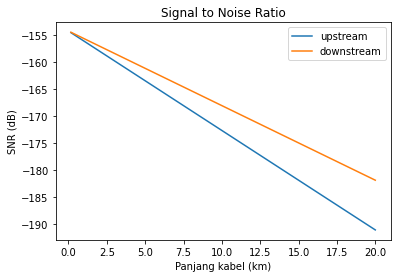

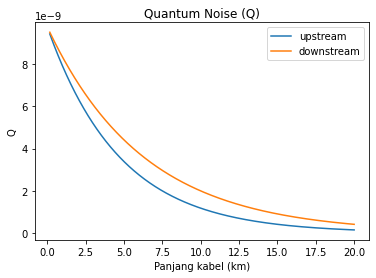

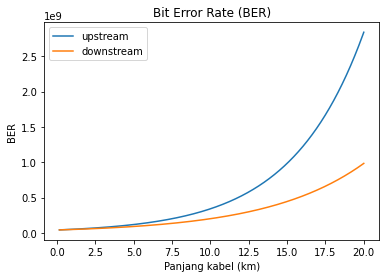

In [ ]:
#Grafik SNR
plt.plot(p, SNRu, label="upstream")
plt.plot(p, SNRd, label="downstream")
plt.title('Signal to Noise Ratio')
plt.xlabel('Panjang kabel (km)')
plt.ylabel('SNR (dB)')
plt.legend()
plt.show()
#Grafik Q
plt.plot(p, Qu, label="upstream")
plt.plot(p, Qd, label="downstream")
plt.title('Quantum Noise (Q)')
plt.xlabel('Panjang kabel (km)')
plt.ylabel('Q')
plt.legend()
plt.show()
#Grafik Bit error rate
plt.plot(p, BERu, label="upstream")
plt.plot(p, BERd, label="downstream")
plt.title('Bit Error Rate (BER)')
plt.xlabel('Panjang kabel (km)')
plt.ylabel('BER')
plt.legend()
plt.show()

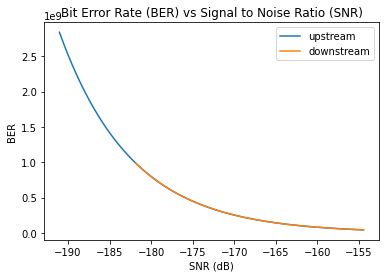

In [ ]:
#Grafik BER vs SNR
plt.plot(SNRu, BERu, label="upstream")
plt.plot(SNRd, BERd, label="downstream")
plt.title('Bit Error Rate (BER) vs Signal to Noise Ratio (SNR)')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.legend()
plt.show()